<img src = "consoles_stack.jpg">
<h1 align=center><font size = 5>Final Project // <font color='orange'>HACKTIV8</font> BATCH 41</font></h1>

# Video Games Sales

Siapa yang tidak suka dengan video games? Semua orang suka dengan video games, dari anak kecil sampai orang dewasa suka dengan video games. Final Project ini saya melakukan analisis terhadap penjualan video games dari tahun 1977 sampai dengan 2017 dari berbagai platform, genre, dan publisher.

### Import Library

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 21)
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('dataset/vgsales.csv')

Dataset tersebut di download dari [Video Game Sales](https://https://www.kaggle.com/gregorut/videogamesales) di Kaggle. Kumpulan data ini berisi daftar video game dengan penjualan lebih dari 100.000 eksemplar.

Dataset tersebut berisi kolom-kolom sebagai berikut :

- `Rank` - Peringkat keseluruhan penjualan.

- `Name` - Nama game.

- `Platform` - Platforn game (contoh : Nintendo Game Boy, Playstation, Xbox, dll).

- `Year` - Tahun perilisan game.

- `Genre` - Genre game (contoh : Action, Sport, Racing, dll).

- `Publisher` - Nama penerbit game.

- `NA_Sales` - Jumlah penjualan di Amerika Utara (Amerika Serikat, Kanada, dll) (dalam jutaan).

- `EU_Sales` - Jumlah penjualan di Eropa (dalam jutaan).

- `JP_Sales` - Jumlah penjualan di Jepang (dalam jutaan).

- `Other_Sales` - Jumlah penjualan di seluruh dunia (dalam jutaan).

- `Global_Sales` - Total penjualan di seluruh dunia.

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16592,16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16593,16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16594,16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16595,16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
data.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16587,16588,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16588,16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16589,16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16590,16591,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16591,16592,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16592,16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16593,16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16594,16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16595,16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16596,16597,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [6]:
data.shape

(16597, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16597 non-null  int64  
 1   Name          16597 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16597 non-null  int64  
 4   Genre         16597 non-null  object 
 5   Publisher     16597 non-null  object 
 6   NA_Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP_Sales      16597 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  Global_Sales  16597 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [8]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Dari hasil diatas, dapat dipastikan tiddak ada data yang hilang (missing).

### Explatory Data Analysis and Visualization

In [9]:
# Tahun dimana paling banyak game di rilis.
data['Year'].value_counts().sort_index()

1977       4
1978       6
1979       1
1980      13
1981      46
1982      37
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      18
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     291
1998     381
1999     344
2000     352
2001     491
2002     850
2003     791
2004     775
2005     957
2006    1029
2007    1218
2008    1457
2009    1452
2010    1285
2011    1180
2012     664
2013     549
2014     583
2015     615
2016     345
2017       3
Name: Year, dtype: int64

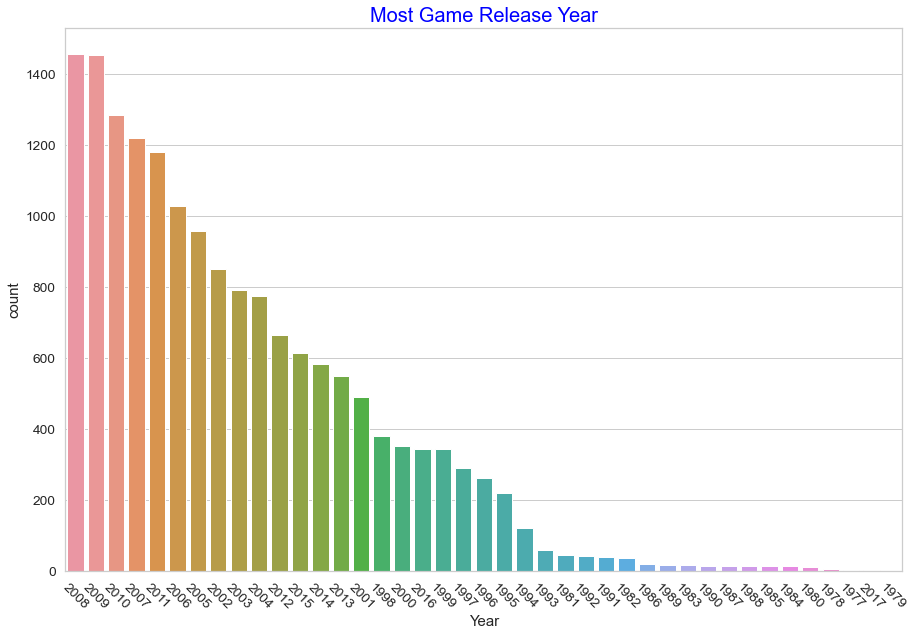

In [10]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.set_style('whitegrid')
sns.countplot(x="Year", data=data, order = data['Year'].value_counts().index)
plt.title('Most Game Release Year', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

Dari hasil data dan visualisasi data diatas, kita bisa lihat bahwa tahun **2008** adalah tahun dimana paling banyak game dirilis ke pasaran.

In [11]:
# Genre yang paling banyak dijual di pasaran
data['Genre'].value_counts().sort_index()

Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       866
Sports          2346
Strategy         681
Name: Genre, dtype: int64

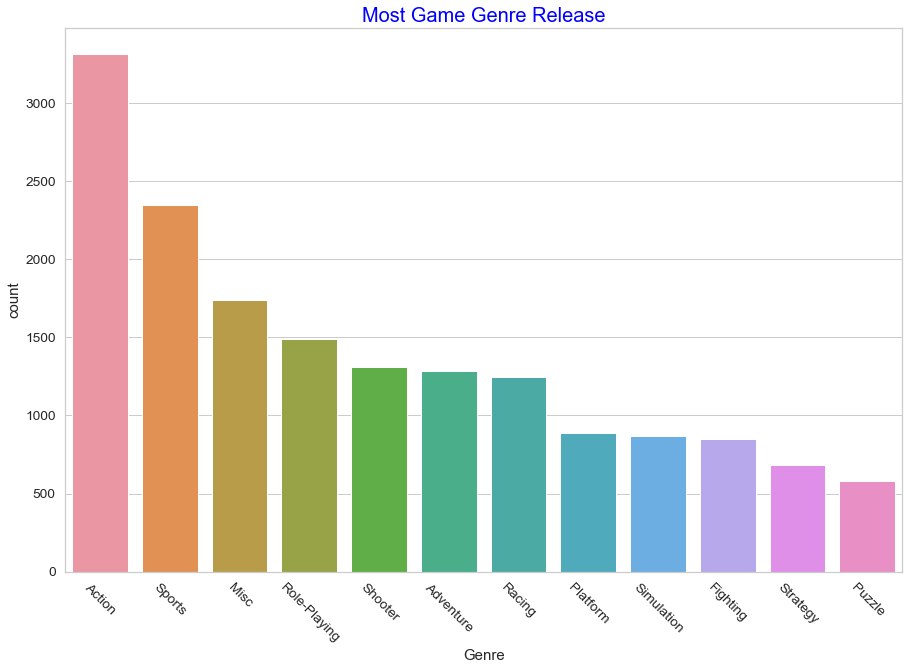

In [12]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.set_style('whitegrid')
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.title('Most Game Genre Release', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

Dari hasil data dan visualisasi data diatas, kita bisa lihat bahwa game dengan genre ***Action*** adalah game yang paling banyak dirilis ke pasaran.

In [13]:
# Platform yang paling banyak merilis game.
data['Platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      509
DC        52
DS      2162
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
Name: Platform, dtype: int64

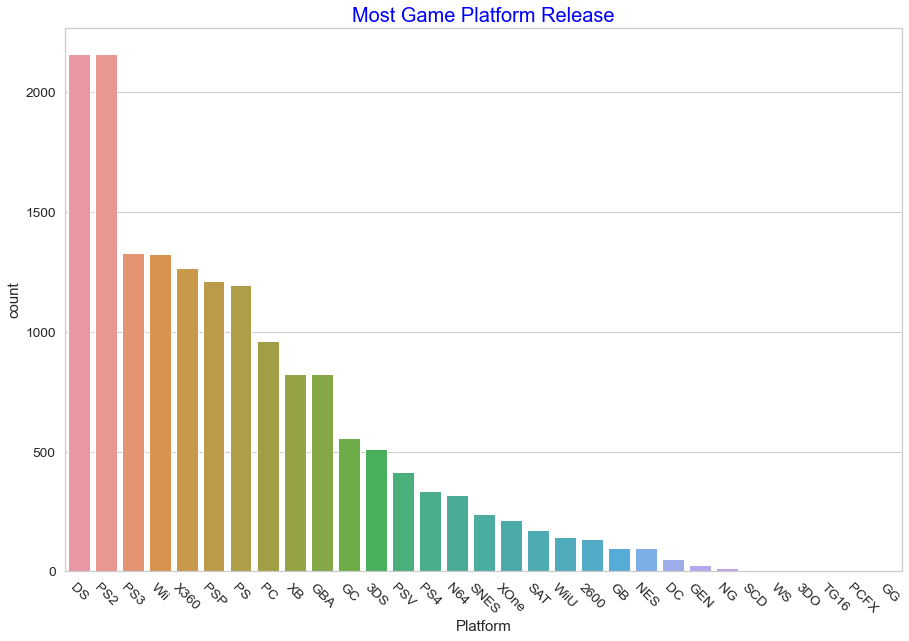

In [14]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.set_style('whitegrid')
sns.countplot(x="Platform", data=data, order = data['Platform'].value_counts().index)
plt.title('Most Game Platform Release', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

Dari hasil data dan visualisasi data diatas, kita bisa lihat bahwa game di platform ***Nintendo DS*** yang paling banyak dijual di pasaran.

In [15]:
# Publisher yang paling banyak mengeluarkan game
top5pub = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(5)
top5pub = pd.DataFrame(top5pub).reset_index()
top5pub

,Publisher,Year
0,Electronic Arts,1362
1,Activision,980
2,Namco Bandai Games,939
3,Ubisoft,926
4,Konami Digital Entertainment,840


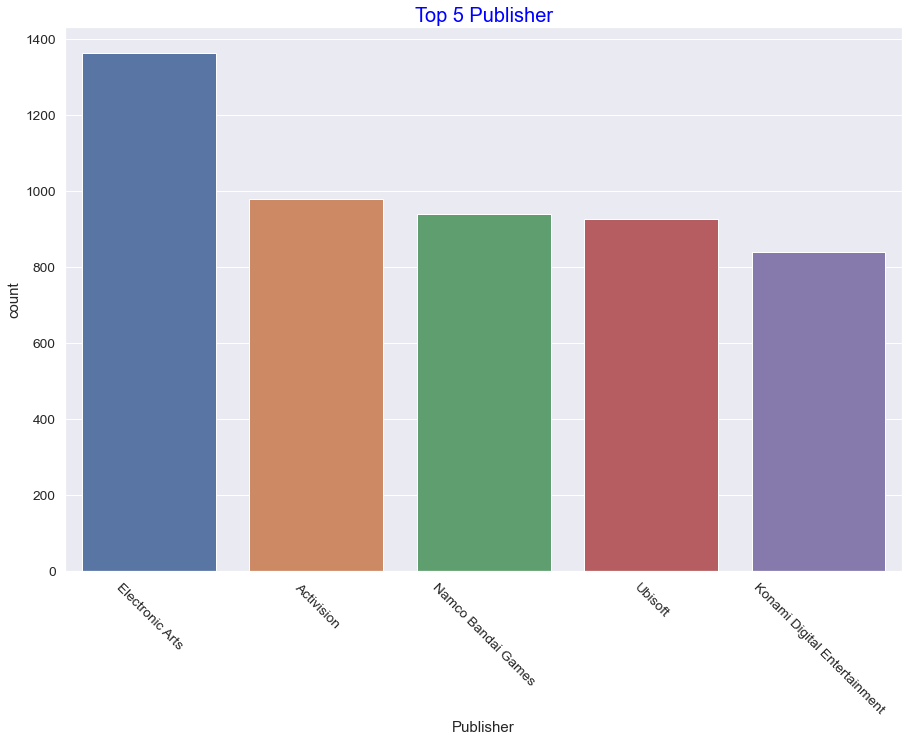

In [16]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:5].index)
plt.title('Top 5 Publisher', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

Dari hasil data dan visualisasi data diatas, kita bisa lihat ***5 Besar Penerbit Game*** yang paling banyak mengeluarkan game.

### Highest Sales in Each Market Year-By-Year

In [17]:
# Penjuaan tertinggi di pasar Amerika Utara
na_market = data.groupby(by=['Year'])['NA_Sales'].sum()
na_market = na_market.reset_index()

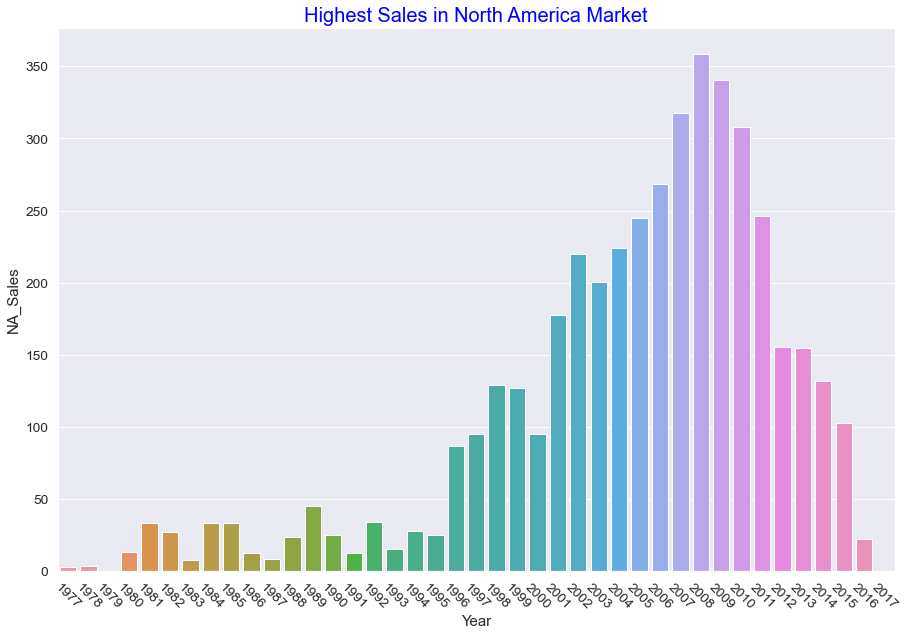

In [18]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.barplot(x="Year", y="NA_Sales", data=na_market)
plt.title('Highest Sales in North America Market', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

In [19]:
# Penjualan tertinggi di pasar Eropa
eu_market = data.groupby(by=['Year'])['EU_Sales'].sum()
eu_market = eu_market.reset_index()

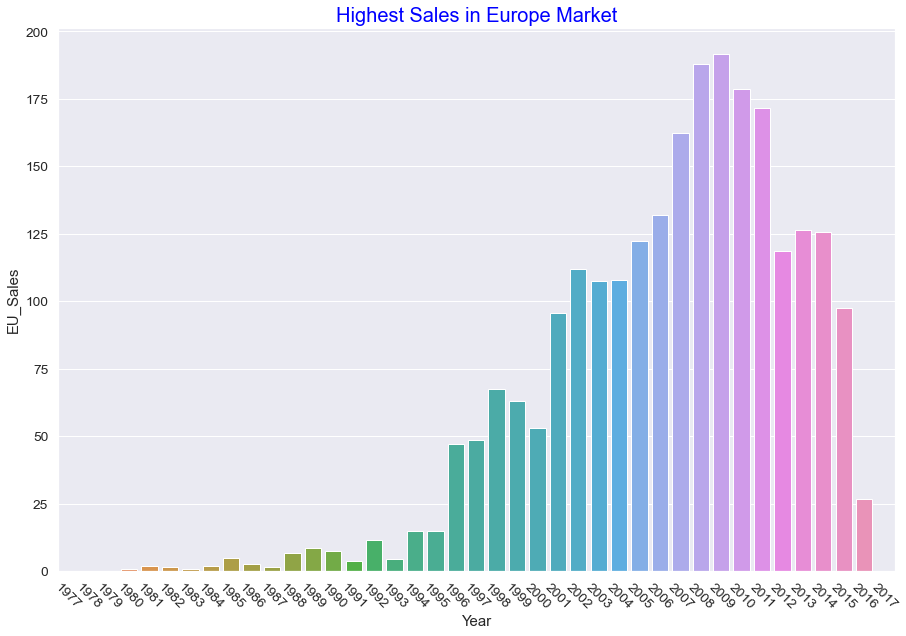

In [20]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.barplot(x="Year", y="EU_Sales", data=eu_market)
plt.title('Highest Sales in Europe Market', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

In [21]:
# Penjualan tertinggi di pasar Jepang
jp_market = data.groupby(by=['Year'])['JP_Sales'].sum()
jp_market = jp_market.reset_index()

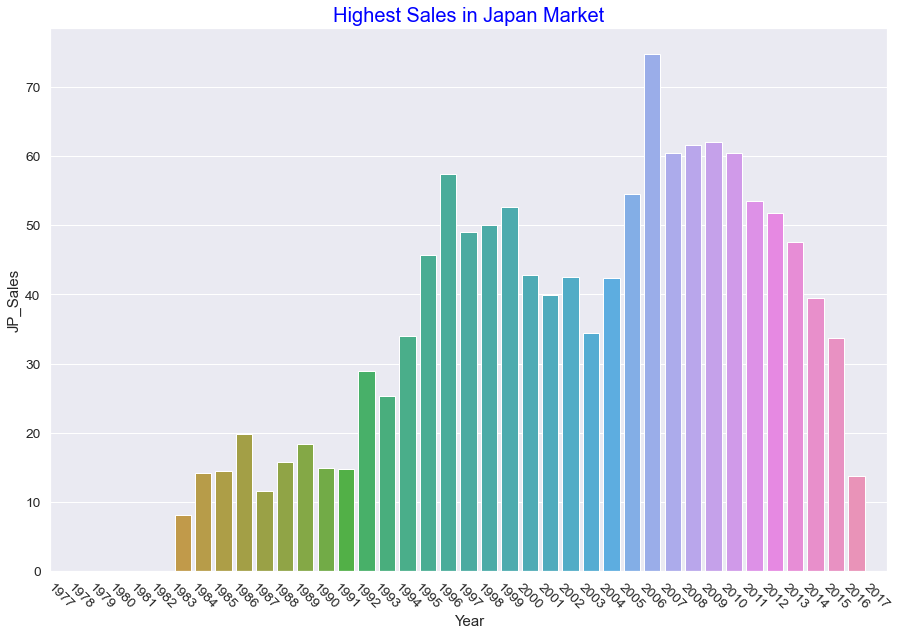

In [22]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.barplot(x="Year", y="JP_Sales", data=jp_market)
plt.title('Highest Sales in Japan Market', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

In [23]:
# Penjualan tertinggi di pasar global
global_market = data.groupby(by=['Year'])['Global_Sales'].sum()
global_market = global_market.reset_index()

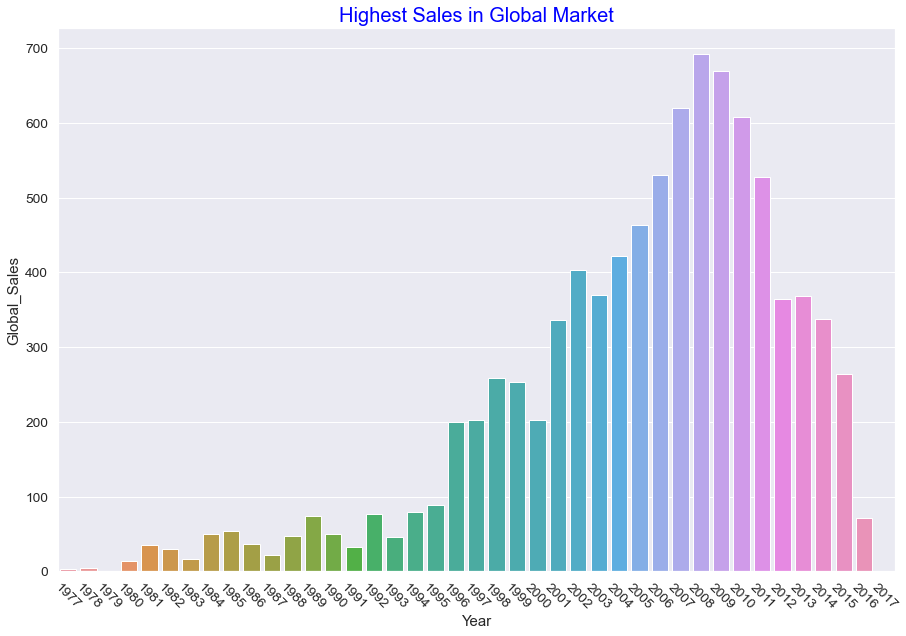

In [24]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.barplot(x="Year", y="Global_Sales", data=global_market)
plt.title('Highest Sales in Global Market', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

### Genre Game yang Memiliki Penjualan Tertinggi Selama 1977 - 2017

In [25]:
genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
genre = genre.reset_index()
genre = genre.sort_values(by=['Global_Sales'], ascending=False)

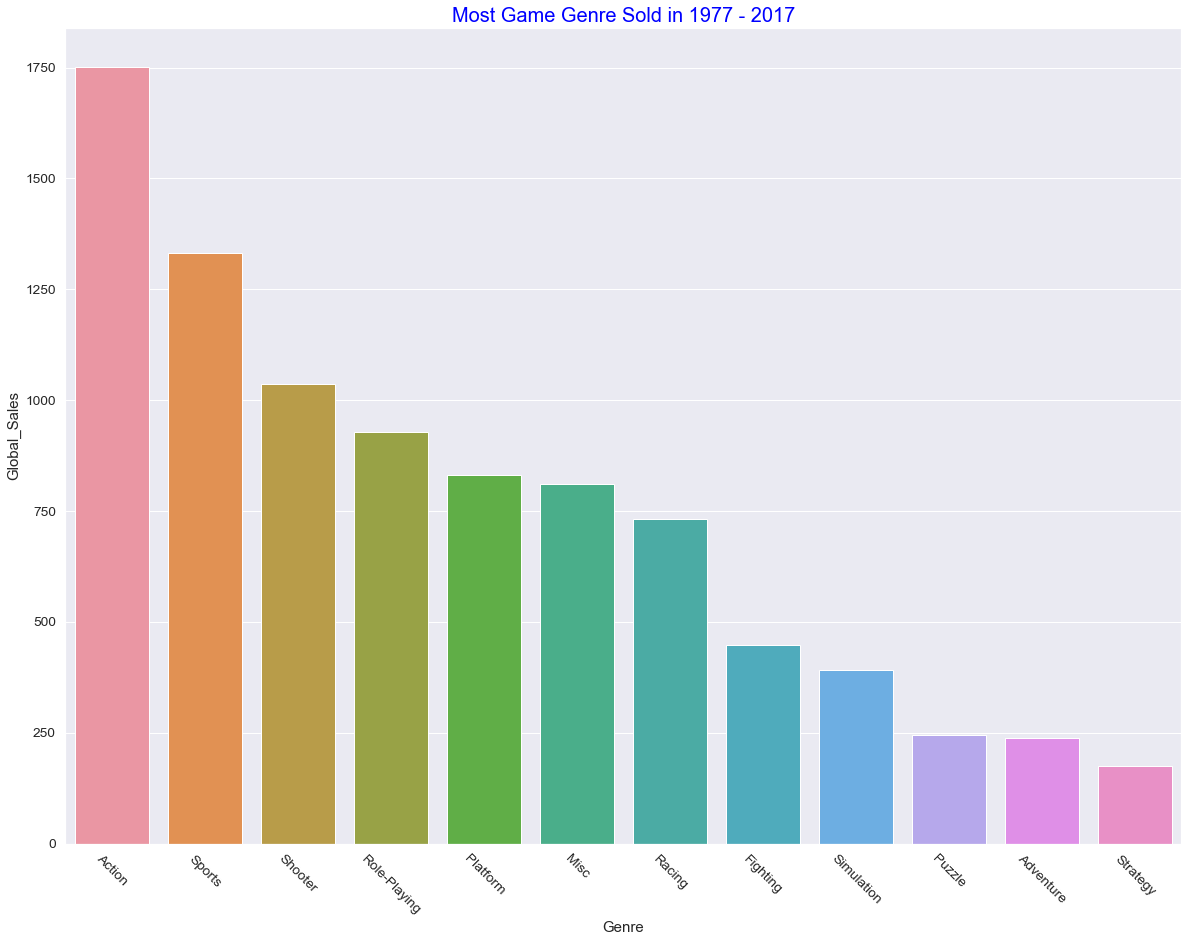

In [26]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1.25)
sns.barplot(x="Genre", y="Global_Sales", data=genre)
plt.title('Most Game Genre Sold in 1977 - 2017', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

### Platform Game Yang Memiliki Penjualan Tertinggi Selama 1977-2017

In [27]:
platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
platform = platform.reset_index()
platform = platform.sort_values(by=['Global_Sales'], ascending=False)

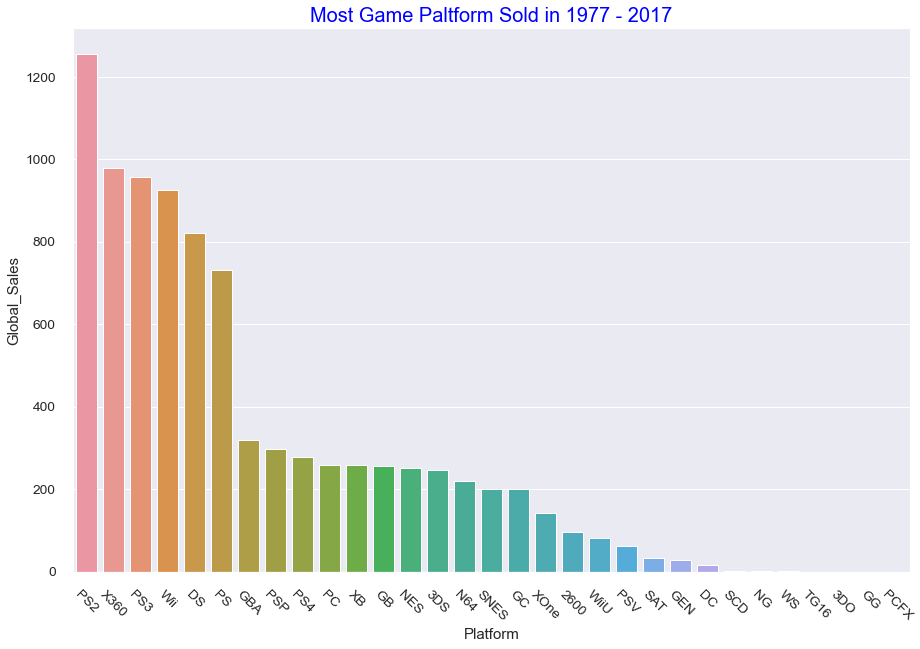

In [58]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.barplot(x="Platform", y="Global_Sales", data=platform)
plt.title('Most Game Paltform Sold in 1977 - 2017', fontsize=20, color='blue')
plt.xticks(rotation=-45)
plt.show()

### Perbandingan Penjualan Game Berdasarkan Genre 

In [29]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

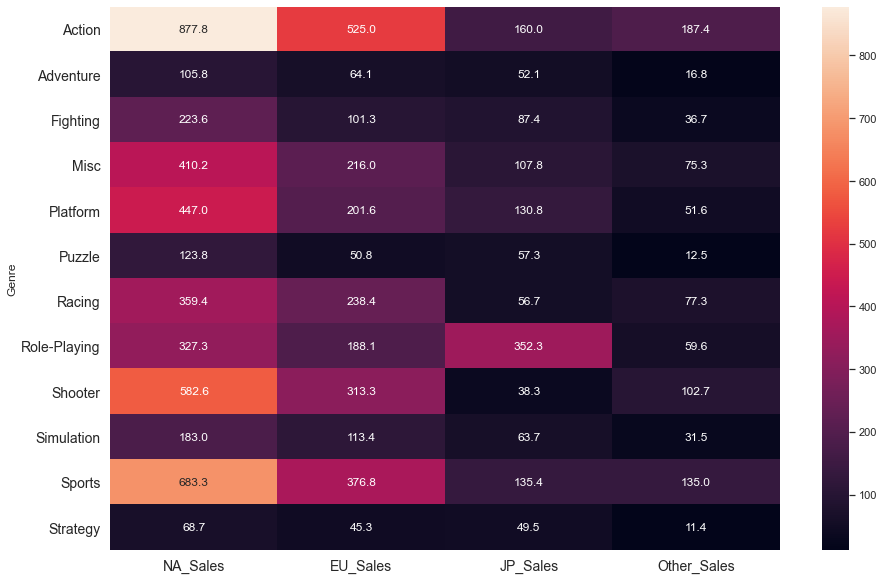

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                     var_name='Sale_Area', value_name='Sale_Price')

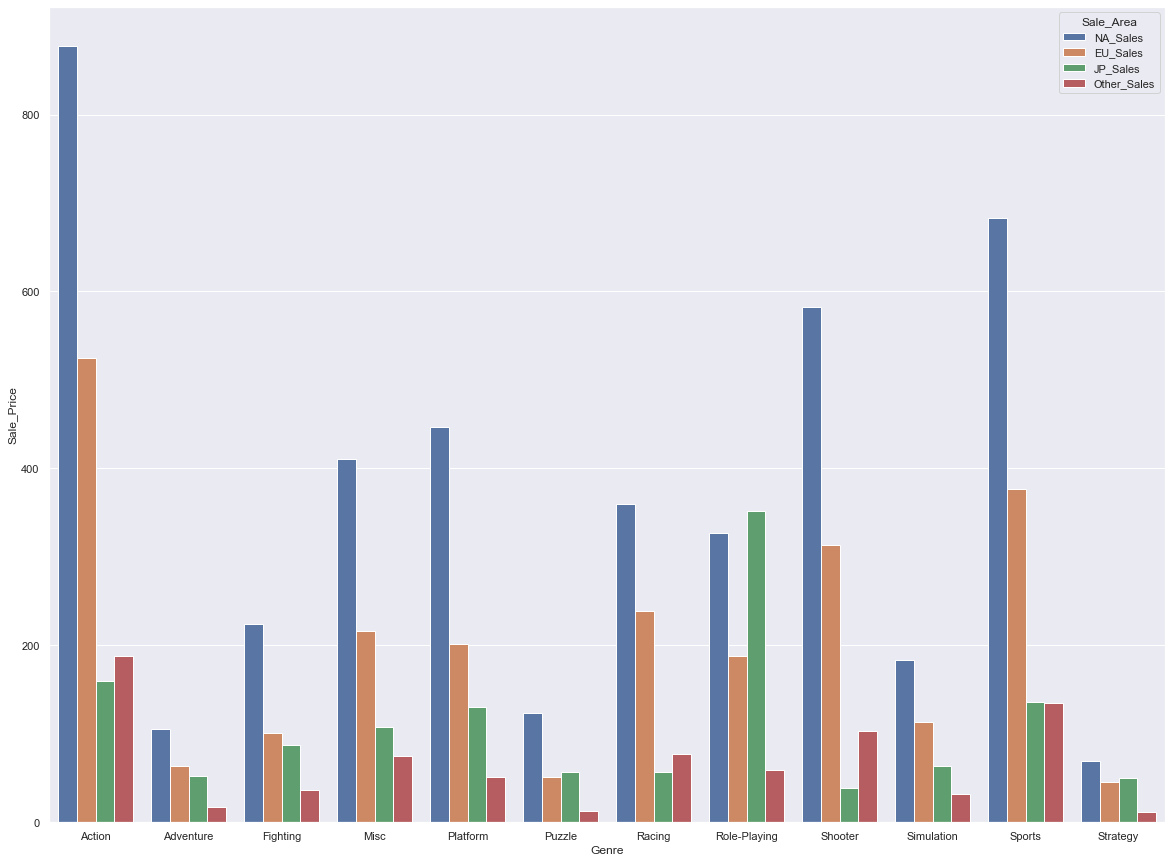

In [32]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

### 5 Penerbit Terbesar

In [33]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(5)
top_publisher = pd.DataFrame(top_publisher).reset_index()

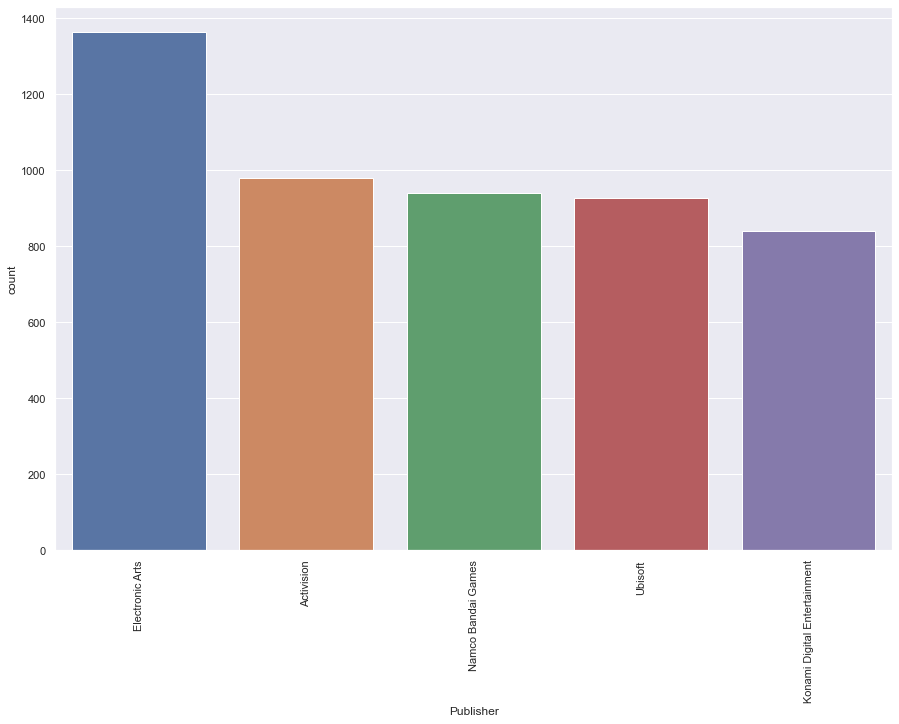

In [34]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:5].index)
plt.xticks(rotation=90)
plt.show()

In [35]:
## Defining the features and the dependent variable
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
print(X[0])
print(y)

['Wii Sports' 'Wii' 2006 'Sports' 'Nintendo' 41.49 29.02 3.77 8.46]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


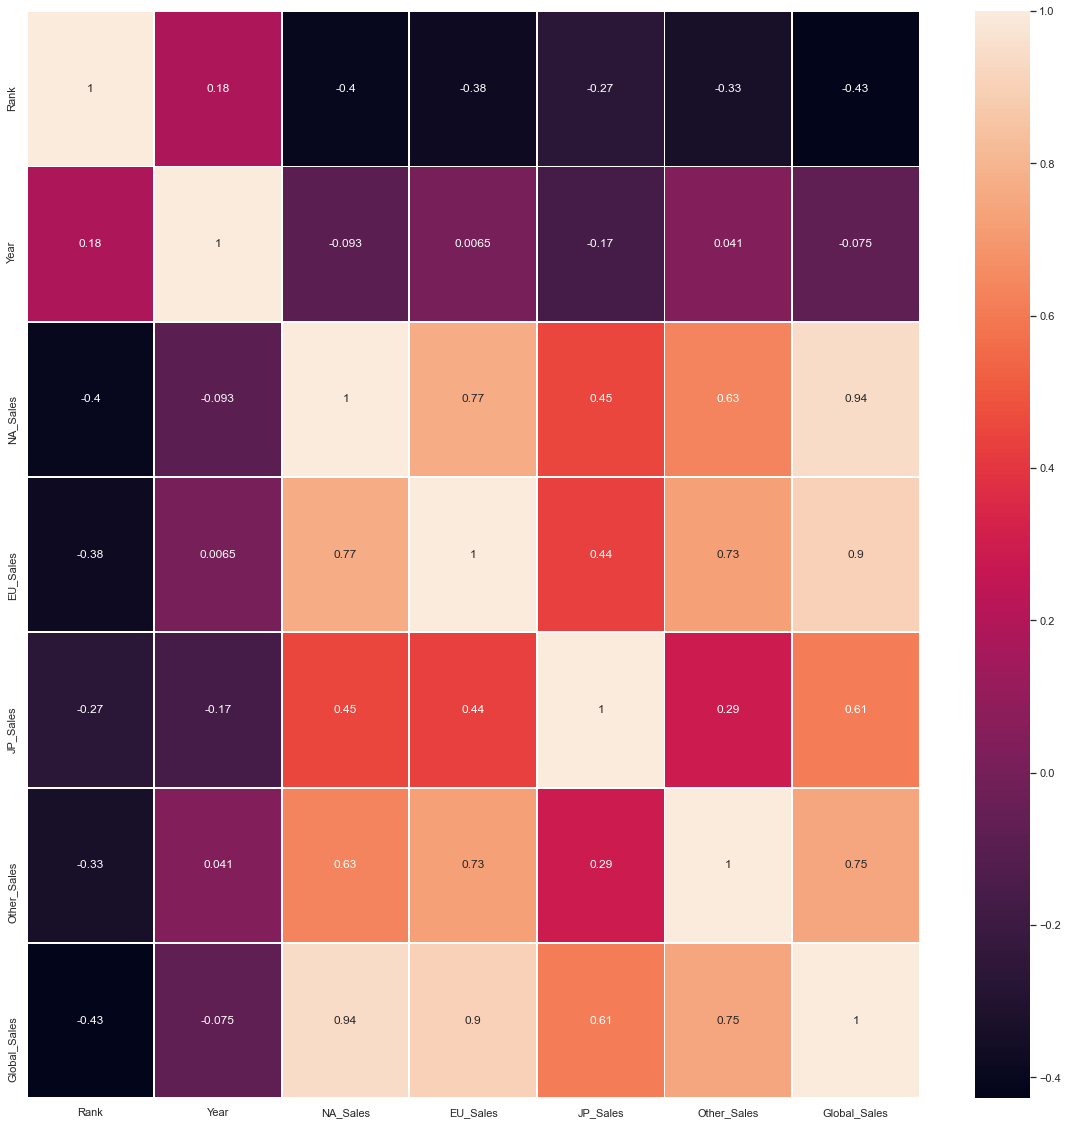

In [36]:
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plotting heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidths=.75)
plt.show()

Dari heatmap correlation di atas kita bisa lihat bahwa penjualan game di pasar Amerika Utara dan Eropa mempengaruhi penjualan global karena korelasinya adalah di angka 0.9

## Modelling

In [37]:
# Retaining only the useful features of the dataset
# From the heatmap, we can decipher that the columns NA_Sales,JP_Sales,EU_Sales and Other_Sales are the most useful features
# in determining the global sales
X = data.iloc[:,6:-1].values
print(X[0])

[41.49 29.02  3.77  8.46]


In [38]:
## Splitting the dataset into independent and dependent vaiables
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
print(X_train)
print('*'*50)
print(X_test)
print('*'*50)
print(y_train)
print('*'*50)
print(y_test)

[[0.   0.   0.03 0.  ]
 [0.08 0.02 0.   0.  ]
 [0.   0.   0.09 0.  ]
 ...
 [0.06 0.05 0.   0.02]
 [0.07 0.   0.02 0.01]
 [0.41 0.21 0.   0.14]]
**************************************************
[[1.350e+00 6.000e-01 8.000e-01 4.400e-01]
 [0.000e+00 2.000e-02 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e-02 0.000e+00]
 ...
 [0.000e+00 0.000e+00 1.400e-01 0.000e+00]
 [1.403e+01 9.200e+00 2.930e+00 2.850e+00]
 [8.000e-02 0.000e+00 0.000e+00 1.000e-02]]
**************************************************
[0.03 0.11 0.09 ... 0.12 0.1  0.75]
**************************************************
[3.190e+00 2.000e-02 2.000e-02 ... 1.400e-01 2.902e+01 9.000e-02]


### Linear Regression

In [40]:
## Training the multiple linear regression on the training set
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
## Predicting test results
y_pred = lr.predict(X_test)

In [42]:
# Calculating r2 score
r2_lr = r2_score(y_test,y_pred)
print(r2_lr)

0.9999878996537217


### K-Nearest Neighbors Regression

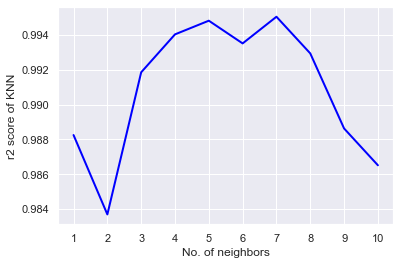

In [43]:
## Finding the optimal number of neighbors for KNN regression
knn_range = range(1,11,1)
scores_list = []
for i in knn_range:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,y_train)
    y_pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knn_range,scores_list,linewidth=2,color='blue')
plt.xticks(knn_range)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()

In [44]:
# Training the KNN model on the training set
reg_knn = KNeighborsRegressor(n_neighbors=7)
reg_knn.fit(X_train,y_train)
y_pred = reg_knn.predict(X_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.99505696702014


### Decision Tree Regression

In [45]:
# Training the Decision Tree regression on the training model
reg_dtree = DecisionTreeRegressor(random_state=50)
reg_dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=50)

In [46]:
# Predicting test results
y_pred = reg_dtree.predict(X_test)

In [47]:
# Calculating r2 score
r2_dtree = r2_score(y_test,y_pred)
print(r2_dtree)

0.9472615146707798


### Random Forest Regression

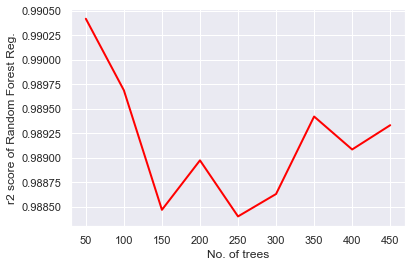

In [48]:
# Finding out the optimal number of trees for Random Forest Regression
forestrange=range(50,500,50)
scores_list=[]
for i in forestrange: 
    reg_rforest = RandomForestRegressor(n_estimators=i,random_state=50)
    reg_rforest.fit(X_train,y_train)
    y_pred = reg_rforest.predict(X_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestrange,scores_list,linewidth=2,color='red')
plt.xticks(forestrange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()  

In [49]:
# Training the Random Forest regression on the training model
reg_rdmforest = RandomForestRegressor(n_estimators=100,random_state=50)
reg_rdmforest.fit(X_train,y_train)
y_pred = reg_rdmforest.predict(X_test)
r2_rdmforest = r2_score(y_test,y_pred)
print(r2_rdmforest)

0.9896885869027963


In [50]:
## Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [51]:
print(X_train)
print('*'*50)
print(X_test)
print('*'*50)
print(y_test)
print('*'*50)
print(y_train)

[[-0.32579674 -0.28470591 -0.15487259 -0.24694052]
 [-0.22687578 -0.24586256 -0.25155963 -0.24694052]
 [-0.32579674 -0.28470591  0.0385015  -0.24694052]
 ...
 [-0.25160602 -0.18759754 -0.25155963 -0.14466872]
 [-0.2392409  -0.28470591 -0.1871016  -0.19580462]
 [ 0.18117317  0.12314924 -0.25155963  0.46896207]]
**************************************************
[[ 1.34349444  0.8805945   2.32676149  2.00303905]
 [-0.32579674 -0.24586256 -0.25155963 -0.24694052]
 [-0.32579674 -0.28470591 -0.1871016  -0.24694052]
 ...
 [-0.32579674 -0.28470591  0.19964657 -0.24694052]
 [17.02246642 17.58323369  9.19154147 14.32679083]
 [-0.22687578 -0.28470591 -0.25155963 -0.19580462]]
**************************************************
[[ 1.69071721]
 [-0.3292413 ]
 [-0.3292413 ]
 ...
 [-0.252776  ]
 [18.14987447]
 [-0.28463654]]
**************************************************
[[-0.32286919]
 [-0.27189232]
 [-0.28463654]
 ...
 [-0.26552021]
 [-0.27826443]
 [ 0.13592265]]


In [52]:
## Comparing the r2 scores of different models
labelList = ['Linear Reg.','K-NearestNeighbors','Decision Tree','Random Forest']
mylist = [r2_lr,r2_knn,r2_dtree,r2_rdmforest]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.999, 99.506, 94.726, 98.969]


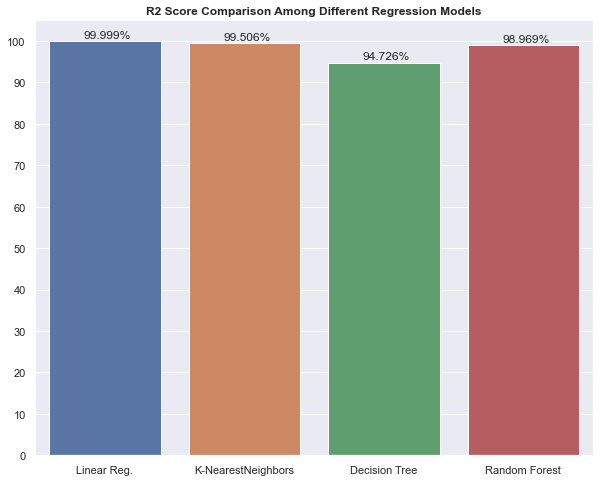

In [54]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('R2 Score Comparison Among Different Regression Models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

Analysis
Berdasarkan klasifikasi diatas dengan menggunakan beberapa model maka berikut adalah kesimpulan yang dapat diambil :

- Linear Regression Accuracy = 99.9%
- KNN Regression = 99.5%
- Decision Tree Accuracy = 94.7%
- Random Forest Accuracy = 98.9%

Jika berdasarkan accuracy maka model yang paling tinggi accuracy nya adalah model yang menggunakan Linear Regression. Jadi dapat dikatakan Linear Regression adalah regression yang paling baik untuk case ini.